In [17]:
import turicreate as tc
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
sales = tc.SFrame.read_csv('Philadelphia_Crime_Rate_noNA.csv/')

Finished parsing file /Users/jessequinn/Desktop/Coursera/ml-regression/02_simple-linear-regression/06_discussion-and-summary-of-simple-linear-regression/Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.02957 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,float,float,float,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/jessequinn/Desktop/Coursera/ml-regression/02_simple-linear-regression/06_discussion-and-summary-of-simple-linear-regression/Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.006139 secs.

In [19]:
sales

HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
124186,12.4186,19.5,25.0,8.0,Aston,Delaware
110490,11.049,49.4,25.0,2.7,Bensalem,Bucks
79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
92634,9.2634,48.6,20.0,0.6,Bristol T.,Bucks
89246,8.9246,30.8,15.0,-2.6,Brookhaven,Delaware
195145,19.5145,10.8,20.0,-3.5,Bryn Athyn,Montgome
297342,29.7342,20.2,14.0,0.6,Bryn Mawr,Montgome
264298,26.4298,20.4,26.0,6.0,Buckingham,Bucks


In [20]:
tc.show(x=sales['CrimeRate'],y=sales['HousePrice'],xlabel='Crime Rate',ylabel='House Prices')

Materializing X axis SArray

Materializing Y axis SArray

In [21]:
crime_model = tc.linear_regression.create(sales,target='HousePrice',features=['CrimeRate'],validation_set=None,verbose=False)

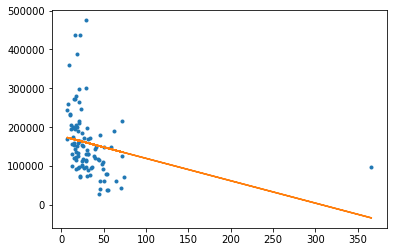

In [24]:
plt.plot(
    sales['CrimeRate'],sales['HousePrice'],'.',
    sales['CrimeRate'],crime_model.predict(sales),'-'
)

In [25]:
sales_noCC = sales[sales['MilesPhila'] != 0.0] 

In [27]:
tc.show(x=sales_noCC['CrimeRate'],y=sales_noCC['HousePrice'],xlabel='Crime Rate',ylabel='House Prices')

Materializing X axis SArray

Materializing Y axis SArray

In [28]:
crime_model_noCC = tc.linear_regression.create(sales_noCC, target='HousePrice', features=['CrimeRate'],validation_set=None, verbose=False)

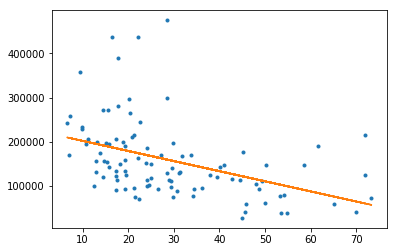

In [36]:
plt.plot(
    sales_noCC['CrimeRate'],sales_noCC['HousePrice'],'.',
    sales_noCC['CrimeRate'],crime_model_noCC.predict(sales_noCC),'-'
)

In [37]:
crime_model.coefficients

name,index,value,stderr
(intercept),None,176626.04688088188,11245.588218661533
CrimeRate,None,-576.8049490581083,226.9022594951474


In [38]:
crime_model_noCC.coefficients

name,index,value,stderr
(intercept),None,225204.60430309843,16404.02474825294
CrimeRate,None,-2287.6971744328953,491.537478029159


In [39]:
sales_nohighend = sales_noCC[sales_noCC['HousePrice'] < 350000] 
crime_model_nohighend = tc.linear_regression.create(sales_nohighend, target='HousePrice', features=['CrimeRate'],validation_set=None, verbose=False)

In [40]:
crime_model_noCC.coefficients

name,index,value,stderr
(intercept),None,225204.60430309843,16404.02474825294
CrimeRate,None,-2287.6971744328953,491.537478029159


In [41]:
crime_model_nohighend.coefficients

name,index,value,stderr
(intercept),None,199073.58961525132,11932.510108021872
CrimeRate,None,-1837.7128098887258,351.51960926112616
